# Decision Tree Classification in Python using Scikit-Learn

This program is a simple example to demonstrate how to apply a classification model using Decision Tree Classification algorithm. The goal is to predict two possible classes of customers, they that will purchase or not a SUV model.

**Dataset Description**

The dataset is composed by 3 columns and 400 rows. The feature (columns) are Age, Estimated Salary and Purchases (target variable 0 or 1). Each row represents one customer.

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset 

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values # Independent Variables
y = dataset.iloc[:, -1].values # Dependent Variable

## Splitting Dataset into Training and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Building the model - Decision Tree Classifier

**Definition from Scikit-Learn website**

**Decision Trees (DTs**) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

**Mathematical Formulation**

Given training vectors $x_{i} \in R^{N}$, $i=1,…n$ and a label vector $y \in R^{l}$, a decision tree recursively partitions the feature space such that the samples with the same labels or similar target values are grouped together.

Let the data at node $m$ be represented by $Q_{m}$ with $N_{m}$ samples. For each candidate split $\theta = (j, t_{m})$ consisting of a feature $j$ and threshold $t_{m}$, partition the data into $Q_{m}^{left}(\theta)$ and $Q_{m}^{right}(\theta)$ subsets

$Q_{m}^{left}(\theta) = \lbrace (x,y)|y <=t_{m}\rbrace\\
Q_{m}^{right}(\theta) = Q_{m}\ Q_{m}^{left}(\theta).
$

The quality of a candidate split of node $m$ is then computed using an impurity function or loss function $H()$, the choice of which depends on the task being solved (classification or regression)

$G(Q_{m}, \theta) = \frac{N_{m}^{left}}{N_{m}}H(Q_{m}^{left}(\theta)) + \frac{N_{m}^{right}}{N_{m}}H(Q_{m}^{right}(\theta))$.

Select the parameters that minimises the impurity
$\DeclareMathOperator*{\argmax}{argmax} 
\DeclareMathOperator*{\argmin}{argmin}
\DeclareMathOperator*{\min}{min}$

$\theta^{*} =  \argmin_{\theta}G(Q_{m}, \theta)$.

Recurse for subsets $Q_{m}^{left}(\theta^{*})$ and $Q_{m}^{right}(\theta^{*})$ until the maximum allowable depth is reached, $N_{m}<\min_{samples}$ or $N_{m} = 1$.

For a classification problem we have some classification criteria, one of most popular is entropy loss function, we write as

$H(Q_{m})  = - \sum_{k} p_{mk} \log(p_{mk})$.

From Scikit-Learn library we have a class called Tree that contains the object DecisionTreeClassifier.

This method does not require feature scaling.

In [5]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

### Training the model

In [6]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Making a single prediction

In [7]:
print(classifier.predict(sc.transform([[30, 80000]])))

[0]


### Predicting new results

In [8]:
y_pred = classifier.predict(X_test)

### Metrics (accuracy and confusion matrix)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print(accuracy_score(y_test, y_pred))

[[53  5]
 [ 1 21]]
0.925


### Visualizing the results

#### Visualizing the training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


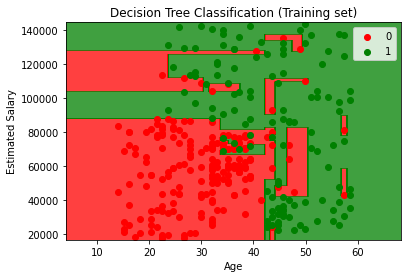

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualizing the test results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


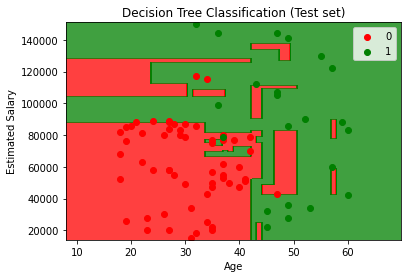

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Visualizing the decision tree

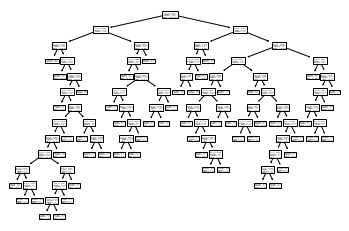

In [12]:
from sklearn import tree
plt.figure()
tree.plot_tree(classifier)
plt.show()

## Conclusion

We employed a Decision Tree Classifier. The accuracy is good, but this method is more complicated to interpret than other non-linear models. We can see in the graphic that the model separates the space in regions which do not give large margins of interpretation. There are other methods based on this model that are more modern and interpretative.